# <font color=green>Import libraries</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set_style('whitegrid')
%matplotlib inline 
pd.set_option("display.max.columns", None)

# <font color=green> spray EDA</font>

In [2]:
# read spray.csv
spray = pd.read_csv('../Assets/spray.csv')
train_cleaned = pd.read_csv('../Assets/train_cleaned.csv')
spray.shape

(14835, 4)

In [3]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [4]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [5]:
# review null data
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [6]:
spray[spray['Time'].isnull()].head(10)

,Date,Time,Latitude,Longitude
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014
1035,2011-09-07,NaN,41.986372,-87.794862
1036,2011-09-07,NaN,41.986228,-87.795582
1037,2011-09-07,NaN,41.984836,-87.793998
1038,2011-09-07,NaN,41.984836,-87.794670
1039,2011-09-07,NaN,41.984884,-87.795198


<font color=green>584 Time==NaN is 4.8% of dataset rows<br>
At this point we may not analyzed till hour-minute granularity, we will not delete them yet    </font>

In [7]:
# check for duplicates
spray.duplicated().value_counts()

False    14294
True       541
dtype: int64

In [8]:
spray[spray.duplicated()].sort_values('Longitude')

,Date,Time,Latitude,Longitude
759,2011-09-07,7:44:32 PM,41.986460,-87.794225
857,2011-09-07,7:44:32 PM,41.986460,-87.794225
856,2011-09-07,7:44:32 PM,41.986460,-87.794225
855,2011-09-07,7:44:32 PM,41.986460,-87.794225
854,2011-09-07,7:44:32 PM,41.986460,-87.794225
...,...,...,...,...
661,2011-09-07,7:44:32 PM,41.986460,-87.794225
660,2011-09-07,7:44:32 PM,41.986460,-87.794225
659,2011-09-07,7:44:32 PM,41.986460,-87.794225
673,2011-09-07,7:44:32 PM,41.986460,-87.794225


In [9]:
spray[spray.duplicated()]['Date'].unique()

array(['2011-09-07'], dtype=object)

In [10]:
spray[spray.duplicated()]['Time'].unique()

array(['7:43:40 PM', '7:44:32 PM'], dtype=object)

In [11]:
spray[spray.duplicated()]['Latitude'].unique()

array([41.98391667, 41.98646   ])

In [12]:
spray[spray.duplicated()]['Longitude'].unique()

array([-87.79308833, -87.794225  ])

In [13]:
spray[spray.duplicated()]['Longitude'].value_counts()

-87.794225    540
-87.793088      1
Name: Longitude, dtype: int64

<font color=green>2 unique rows. 1 of them duplicated ONCE and the other duplicated 540 times<br>
We will delete them</font>

In [14]:
spray.drop_duplicates(inplace=True)
spray.shape

(14294, 4)

### <font color=green>Date</font>

In [15]:
spray['Date'].unique()

array(['2011-08-29', '2011-09-07', '2013-07-17', '2013-07-25',
       '2013-08-08', '2013-08-15', '2013-08-16', '2013-08-22',
       '2013-08-29', '2013-09-05'], dtype=object)

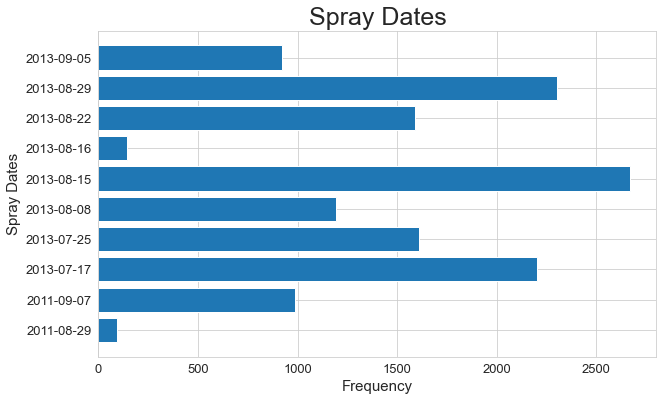

In [16]:
plt.figure(figsize=(10,6))
plt.barh(spray.groupby('Date').agg('count').index, spray.groupby('Date').agg('count')['Time'])

plt.xticks(fontsize=13);
plt.yticks(fontsize=13);
plt.xlabel("Frequency", fontsize=15)
plt.ylabel("Spray Dates", fontsize=15)
plt.title("Spray Dates", fontsize=25);

<font color=green>There are only 10 unique dates from 2011-08-29 till 2013-09-05</font>

In [17]:
# change Date dtype to datetime
spray["Date"] = pd.to_datetime(spray["Date"])
spray.dtypes

Date         datetime64[ns]
Time                 object
Latitude            float64
Longitude           float64
dtype: object

### <font color=green>Latitude</font>

In [18]:
spray['Latitude'].unique()

array([42.39162333, 42.39134833, 42.39102167, ..., 42.00602167,
       42.00545333, 42.004805  ])

In [19]:
len(spray['Latitude'].unique())

12887

<font color=green>There are high number of different 'Latitude' in spray</font>

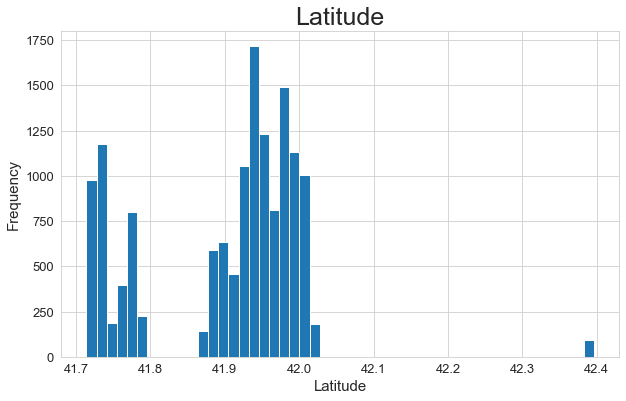

In [20]:
plt.figure(figsize=(10,6))

plt.hist(spray['Latitude'],50);

plt.xticks(fontsize=13);
plt.yticks(fontsize=13);
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Latitude", fontsize=25);

### <font color=green>Longitude</font>

In [21]:
spray['Longitude'].unique()[:10]

array([-88.08916333, -88.08915667, -88.08915833, -88.08885833,
       -88.088315  , -88.08800167, -88.08800333, -88.087995  ,
       -88.08798833, -88.08807833])

In [22]:
len(spray['Longitude'].unique())

13007

<font color=green>There are high number of different 'Longitude' in spray</font>

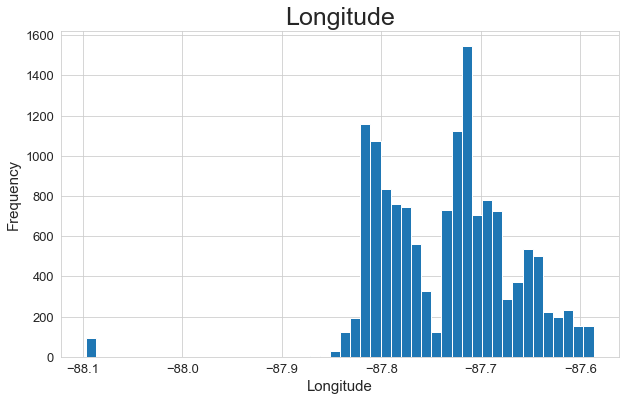

In [23]:
plt.figure(figsize=(10,6))

plt.hist(spray['Longitude'],50);

plt.xticks(fontsize=13);
plt.yticks(fontsize=13);
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Longitude", fontsize=25);

<font color=green>Locations at -88.1/42.4 is outside our scope<br>We will delete them</font>

In [24]:
del_row = spray[spray['Latitude']>42.3].index
spray.drop(del_row, axis=0, inplace=True)
spray.shape

(14199, 4)

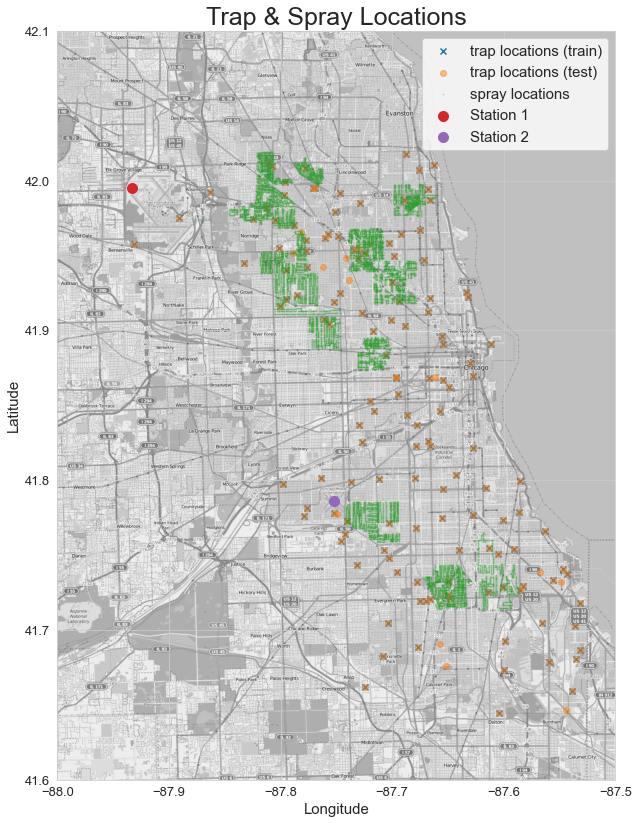

In [25]:
mapdata = np.loadtxt("../Assets/mapdata_copyright_openstreetmap_contributors.txt")
traps_train = pd.read_csv('../Assets/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]
traps_test = pd.read_csv('../Assets/test.csv')[['Date', 'Trap','Longitude', 'Latitude']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_train_traps = traps_train[['Longitude', 'Latitude']].drop_duplicates().values
locations_test_traps = traps_test[['Longitude', 'Latitude']].drop_duplicates().values
spray_locations = spray[['Longitude', 'Latitude']].drop_duplicates().values

plt.scatter(locations_train_traps[:,0], locations_train_traps[:,1], marker='x')
plt.scatter(locations_test_traps[:,0], locations_test_traps[:,1], marker='o', alpha=0.5)
plt.scatter(spray_locations[:,0], spray_locations[:,1], s=1, alpha=0.2)
plt.scatter(-87.933, 41.995, marker='o', s=100)
plt.scatter(-87.752, 41.786, marker='o', s=100)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("Latitude", fontsize=15)
plt.title("Trap & Spray Locations", fontsize=25)
plt.legend(["trap locations (train)", "trap locations (test)", 
            "spray locations", 'Station 1', 'Station 2'], fontsize=15);

# <font color=green>Spraying Efficacy</font>

<font color=green>The spraying activities appears to be focused on 11 "clusters" with 3 of them below latitude 41.8 and the rest above 41.85. We examine these 2 areas in closer details</font>

In [26]:
train_cleaned['date'] = pd.to_datetime(train_cleaned['date'])
train_cleaned.dtypes

date            datetime64[ns]
latitude               float64
longitude              float64
nummosquitos           float64
wnvpresent             float64
                     ...      
trap_T236                int64
trap_T237                int64
trap_T238                int64
trap_T900                int64
trap_T903                int64
Length: 166, dtype: object

In [27]:
spray['Date'].unique()

array(['2011-09-07T00:00:00.000000000', '2013-07-17T00:00:00.000000000',
       '2013-07-25T00:00:00.000000000', '2013-08-08T00:00:00.000000000',
       '2013-08-15T00:00:00.000000000', '2013-08-16T00:00:00.000000000',
       '2013-08-22T00:00:00.000000000', '2013-08-29T00:00:00.000000000',
       '2013-09-05T00:00:00.000000000'], dtype='datetime64[ns]')

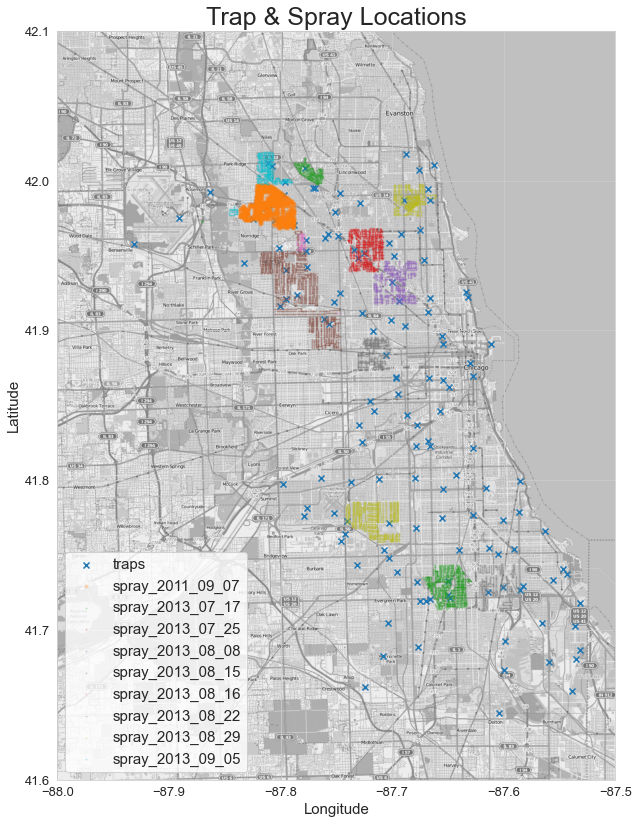

In [28]:
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations_train_traps = traps_train[['Longitude', 'Latitude']].drop_duplicates().values
spray_2011_09_07 = spray[spray['Date']=='2011-09-07T00:00:00.000000000'][['Longitude', 'Latitude']].drop_duplicates().values
spray_2013_07_17 = spray[spray['Date']=='2013-07-17T00:00:00.000000000'][['Longitude', 'Latitude']].drop_duplicates().values
spray_2013_07_25 = spray[spray['Date']=='2013-07-25T00:00:00.000000000'][['Longitude', 'Latitude']].drop_duplicates().values
spray_2013_08_08 = spray[spray['Date']=='2013-08-08T00:00:00.000000000'][['Longitude', 'Latitude']].drop_duplicates().values
spray_2013_08_15 = spray[spray['Date']=='2013-08-15T00:00:00.000000000'][['Longitude', 'Latitude']].drop_duplicates().values
spray_2013_08_16 = spray[spray['Date']=='2013-08-16T00:00:00.000000000'][['Longitude', 'Latitude']].drop_duplicates().values
spray_2013_08_22 = spray[spray['Date']=='2013-08-22T00:00:00.000000000'][['Longitude', 'Latitude']].drop_duplicates().values
spray_2013_08_29 = spray[spray['Date']=='2013-08-29T00:00:00.000000000'][['Longitude', 'Latitude']].drop_duplicates().values
spray_2013_09_05 = spray[spray['Date']=='2013-09-05T00:00:00.000000000'][['Longitude', 'Latitude']].drop_duplicates().values

plt.scatter(locations_train_traps[:,0], locations_train_traps[:,1], marker='x', label='traps')
plt.scatter(spray_2011_09_07[:,0], spray_2011_09_07[:,1], s=10, alpha=0.2, label='spray_2011_09_07')
plt.scatter(spray_2013_07_17[:,0], spray_2013_07_17[:,1], s=1, alpha=0.2, label='spray_2013_07_17')
plt.scatter(spray_2013_07_25[:,0], spray_2013_07_25[:,1], s=1, alpha=0.2, label='spray_2013_07_25')
plt.scatter(spray_2013_08_08[:,0], spray_2013_08_08[:,1], s=1, alpha=0.2, label='spray_2013_08_08')
plt.scatter(spray_2013_08_15[:,0], spray_2013_08_15[:,1], s=1, alpha=0.2, label='spray_2013_08_15')
plt.scatter(spray_2013_08_16[:,0], spray_2013_08_16[:,1], s=1, alpha=0.2, label='spray_2013_08_16')
plt.scatter(spray_2013_08_22[:,0], spray_2013_08_22[:,1], s=1, alpha=0.2, label='spray_2013_08_22')
plt.scatter(spray_2013_08_29[:,0], spray_2013_08_29[:,1], s=1, alpha=0.2, label='spray_2013_08_29')
plt.scatter(spray_2013_09_05[:,0], spray_2013_09_05[:,1], s=1, alpha=0.2, label='spray_2013_09_05')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("Latitude", fontsize=15)
plt.title("Trap & Spray Locations", fontsize=25)
plt.legend(fontsize=15);

### <font color=green>Custer A > Latitude 41.85</font>

In [29]:
cluster_a = train_cleaned[train_cleaned['latitude']>41.85]
spray_a = spray[spray['Latitude']>41.85]

In [30]:
cluster_a.head()

,date,latitude,longitude,nummosquitos,wnvpresent,month,year,day_of_week,day,species_CULEX ERRATICUS,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TARSALIS,species_CULEX TERRITANS,species_UNSPECIFIED CULEX,trap_T001,trap_T002,trap_T002A,trap_T002B,trap_T003,trap_T004,trap_T005,trap_T006,trap_T007,trap_T008,trap_T009,trap_T011,trap_T012,trap_T013,trap_T014,trap_T015,trap_T016,trap_T017,trap_T018,trap_T019,trap_T025,trap_T027,trap_T028,trap_T030,trap_T031,trap_T033,trap_T034,trap_T035,trap_T036,trap_T037,trap_T039,trap_T040,trap_T043,trap_T044,trap_T045,trap_T046,trap_T047,trap_T048,trap_T049,trap_T050,trap_T051,trap_T054,trap_T054C,trap_T060,trap_T061,trap_T062,trap_T063,trap_T065,trap_T065A,trap_T066,trap_T067,trap_T069,trap_T070,trap_T071,trap_T072,trap_T073,trap_T074,trap_T075,trap_T076,trap_T077,trap_T078,trap_T079,trap_T080,trap_T081,trap_T082,trap_T083,trap_T084,trap_T085,trap_T086,trap_T088,trap_T089,trap_T090,trap_T090A,trap_T090B,trap_T090C,trap_T091,trap_T092,trap_T094,trap_T094B,trap_T095,trap_T096,trap_T097,trap_T099,trap_T100,trap_T102,trap_T103,trap_T107,trap_T114,trap_T115,trap_T128,trap_T128A,trap_T129,trap_T135,trap_T138,trap_T141,trap_T142,trap_T143,trap_T144,trap_T145,trap_T146,trap_T147,trap_T148,trap_T149,trap_T150,trap_T151,trap_T152,trap_T153,trap_T154,trap_T155,trap_T156,trap_T157,trap_T158,trap_T159,trap_T160,trap_T161,trap_T162,trap_T200,trap_T200A,trap_T200B,trap_T206,trap_T209,trap_T212,trap_T215,trap_T218,trap_T218A,trap_T218B,trap_T218C,trap_T219,trap_T220,trap_T221,trap_T222,trap_T223,trap_T224,trap_T225,trap_T226,trap_T227,trap_T228,trap_T229,trap_T230,trap_T231,trap_T232,trap_T233,trap_T234,trap_T235,trap_T236,trap_T237,trap_T238,trap_T900,trap_T903
0,2007-05-29,41.954690,-87.800991,1.0,0.0,5,2007,1,29,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2007-05-29,41.954690,-87.800991,1.0,0.0,5,2007,1,29,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2007-05-29,41.994991,-87.769279,1.0,0.0,5,2007,1,29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2007-05-29,41.974089,-87.824812,1.0,0.0,5,2007,1,29,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2007-05-29,41.974089,-87.824812,4.0,0.0,5,2007,1,29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
for day in spray_a['Date'].unique():
    print(day)

2011-09-07T00:00:00.000000000
2013-07-17T00:00:00.000000000
2013-07-25T00:00:00.000000000
2013-08-08T00:00:00.000000000
2013-08-15T00:00:00.000000000
2013-08-16T00:00:00.000000000
2013-08-22T00:00:00.000000000
2013-08-29T00:00:00.000000000
2013-09-05T00:00:00.000000000


In [32]:
def spray_traps(day, cluster):
    max_lat = spray_a[spray_a['Date']==day]['Latitude'].max()
    min_lat = spray_a[spray_a['Date']==day]['Latitude'].min()
    max_long = spray_a[spray_a['Date']==day]['Longitude'].max()
    min_long = spray_a[spray_a['Date']==day]['Longitude'].min()
    trap_stats = cluster_a[(cluster_a['latitude']>=min_lat) &
                           (cluster_a['latitude']<=max_lat) &
                           (cluster_a['longitude']>=min_long) &
                           (cluster_a['longitude']<=max_long)]
    return trap_stats

In [33]:
trap_stats = spray_traps('2011-09-07T00:00:00.000000000', cluster_a)
trap_stats = trap_stats.set_index('date')

trap_stats_agg = trap_stats.groupby('date')['nummosquitos','wnvpresent'].agg(['sum'])
trap_stats_agg.rename(columns={"(nummosquitos, sum)" : "nummosquitos", "(wnvpresent, sum)" : "wnvpresent"}, inplace=True)

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

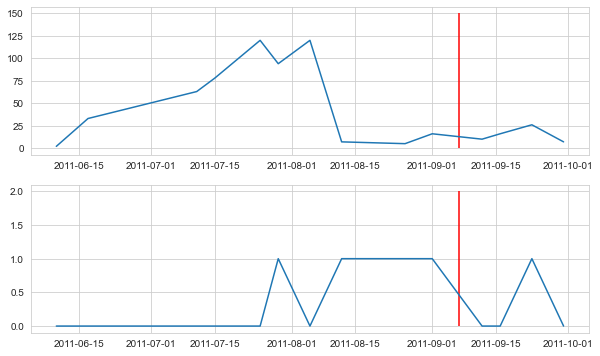

In [34]:
fig = plt.figure()
plt.figure(figsize=(10,6))

plt.subplot(2, 1, 1)
plt.plot(trap_stats_agg['2011'].index, trap_stats_agg['2011']['nummosquitos'])
plt.vlines(x=datetime.datetime(2011, 9, 7), ymin=0, ymax=150, color='r');

plt.subplot(2, 1, 2)
plt.plot(trap_stats_agg['2011'].index, trap_stats_agg['2011']['wnvpresent'])
plt.vlines(x=datetime.datetime(2011, 9, 7), ymin=0, ymax=2, color='r');

In [35]:
trap_stats = spray_traps('2013-07-17T00:00:00.000000000', cluster_a)
trap_stats = trap_stats.set_index('date')

trap_stats_agg = trap_stats.groupby('date')['nummosquitos','wnvpresent'].agg(['sum'])
trap_stats_agg.rename(columns={"(nummosquitos, sum)" : "nummosquitos", "(wnvpresent, sum)" : "wnvpresent"}, inplace=True)

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

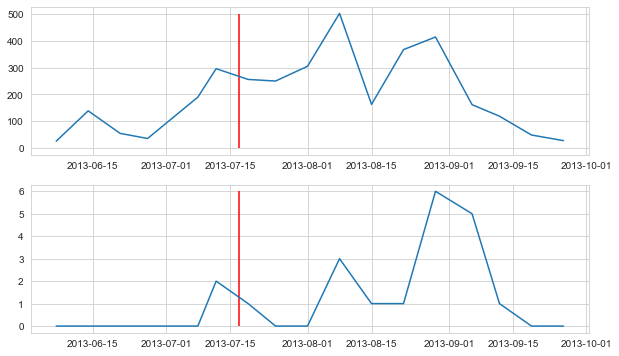

In [36]:
fig = plt.figure()
plt.figure(figsize=(10,6))

plt.subplot(2, 1, 1)
plt.plot(trap_stats_agg['2013'].index, trap_stats_agg['2013']['nummosquitos'])
plt.vlines(x=datetime.datetime(2013, 7, 17), ymin=0, ymax=500, color='r');

plt.subplot(2, 1, 2)
plt.plot(trap_stats_agg['2013'].index, trap_stats_agg['2013']['wnvpresent'])
plt.vlines(x=datetime.datetime(2013, 7, 17), ymin=0, ymax=6, color='r');

In [37]:
trap_stats = spray_traps('2013-07-25T00:00:00.000000000', cluster_a)
trap_stats = trap_stats.set_index('date')

trap_stats_agg = trap_stats.groupby('date')['nummosquitos','wnvpresent'].agg(['sum'])
trap_stats_agg.rename(columns={"(nummosquitos, sum)" : "nummosquitos", "(wnvpresent, sum)" : "wnvpresent"}, inplace=True)

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

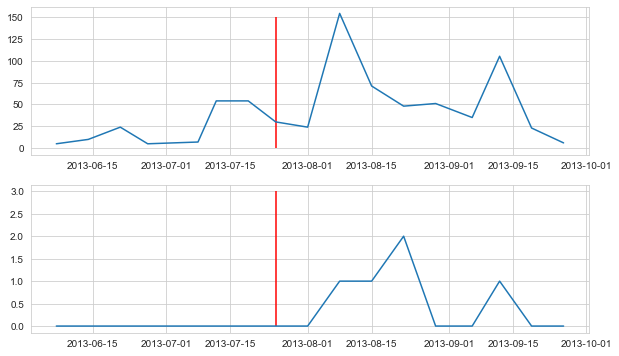

In [60]:
fig = plt.figure()
plt.figure(figsize=(10,6))

plt.subplot(2, 1, 1)
plt.plot(trap_stats_agg['2013'].index, trap_stats_agg['2013']['nummosquitos'])
plt.vlines(x=datetime.datetime(2013, 7, 25), ymin=0, ymax=150, color='r');

plt.subplot(2, 1, 2)
plt.plot(trap_stats_agg['2013'].index, trap_stats_agg['2013']['wnvpresent'])
plt.vlines(x=datetime.datetime(2013, 7, 25), ymin=0, ymax=3, color='r');

In [39]:
trap_stats = spray_traps('2013-08-08T00:00:00.000000000', cluster_a)
trap_stats = trap_stats.set_index('date')

trap_stats_agg = trap_stats.groupby('date')['nummosquitos','wnvpresent'].agg(['sum'])
trap_stats_agg.rename(columns={"(nummosquitos, sum)" : "nummosquitos", "(wnvpresent, sum)" : "wnvpresent"}, inplace=True)

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

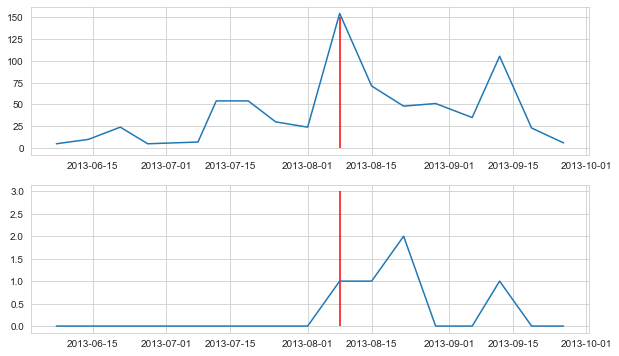

In [62]:
fig = plt.figure()
plt.figure(figsize=(10,6))

plt.subplot(2, 1, 1)
plt.plot(trap_stats_agg['2013'].index, trap_stats_agg['2013']['nummosquitos'])
plt.vlines(x=datetime.datetime(2013, 8, 8), ymin=0, ymax=150, color='r');

plt.subplot(2, 1, 2)
plt.plot(trap_stats_agg['2013'].index, trap_stats_agg['2013']['wnvpresent'])
plt.vlines(x=datetime.datetime(2013, 8, 8), ymin=0, ymax=3, color='r');

In [41]:
trap_stats = spray_traps('2013-08-15T00:00:00.000000000', cluster_a)
trap_stats = trap_stats.set_index('date')

trap_stats_agg = trap_stats.groupby('date')['nummosquitos','wnvpresent'].agg(['sum'])
trap_stats_agg.rename(columns={"(nummosquitos, sum)" : "nummosquitos", "(wnvpresent, sum)" : "wnvpresent"}, inplace=True)

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

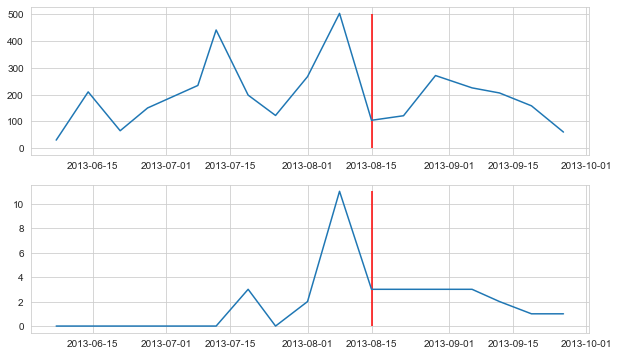

In [42]:
fig = plt.figure()
plt.figure(figsize=(10,6))

plt.subplot(2, 1, 1)
plt.plot(trap_stats_agg['2013'].index, trap_stats_agg['2013']['nummosquitos'])
plt.vlines(x=datetime.datetime(2013, 8, 15), ymin=0, ymax=500, color='r');

plt.subplot(2, 1, 2)
plt.plot(trap_stats_agg['2013'].index, trap_stats_agg['2013']['wnvpresent'])
plt.vlines(x=datetime.datetime(2013, 8, 15), ymin=0, ymax=11, color='r');

In [43]:
trap_stats = spray_traps('2013-08-16T00:00:00.000000000', cluster_a)
trap_stats = trap_stats.set_index('date')

trap_stats_agg = trap_stats.groupby('date')['nummosquitos','wnvpresent'].agg(['sum'])
trap_stats_agg.rename(columns={"(nummosquitos, sum)" : "nummosquitos", "(wnvpresent, sum)" : "wnvpresent"}, inplace=True)

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

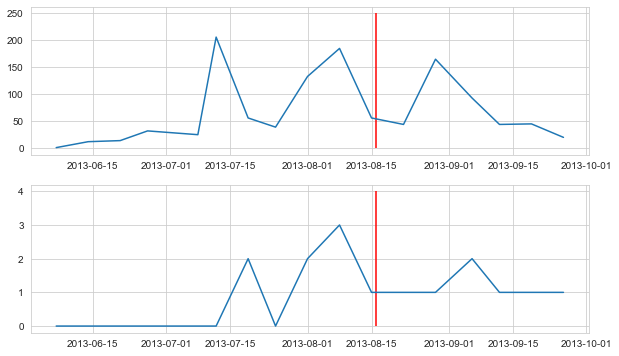

In [44]:
fig = plt.figure()
plt.figure(figsize=(10,6))

plt.subplot(2, 1, 1)
plt.plot(trap_stats_agg['2013'].index, trap_stats_agg['2013']['nummosquitos'])
plt.vlines(x=datetime.datetime(2013, 8, 16), ymin=0, ymax=250, color='r');

plt.subplot(2, 1, 2)
plt.plot(trap_stats_agg['2013'].index, trap_stats_agg['2013']['wnvpresent'])
plt.vlines(x=datetime.datetime(2013, 8, 16), ymin=0, ymax=4, color='r');

In [45]:
trap_stats = spray_traps('2013-08-29T00:00:00.000000000', cluster_a)
trap_stats = trap_stats.set_index('date')

trap_stats_agg = trap_stats.groupby('date')['nummosquitos','wnvpresent'].agg(['sum'])
trap_stats_agg.rename(columns={"(nummosquitos, sum)" : "nummosquitos", "(wnvpresent, sum)" : "wnvpresent"}, inplace=True)

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

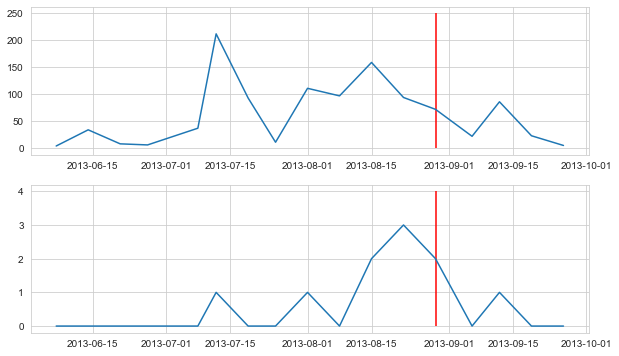

In [46]:
fig = plt.figure()
plt.figure(figsize=(10,6))

plt.subplot(2, 1, 1)
plt.plot(trap_stats_agg['2013'].index, trap_stats_agg['2013']['nummosquitos'])
plt.vlines(x=datetime.datetime(2013, 8, 29), ymin=0, ymax=250, color='r');

plt.subplot(2, 1, 2)
plt.plot(trap_stats_agg['2013'].index, trap_stats_agg['2013']['wnvpresent'])
plt.vlines(x=datetime.datetime(2013, 8, 29), ymin=0, ymax=4, color='r');

In [47]:
trap_stats = spray_traps('2013-09-05T00:00:00.000000000', cluster_a)
trap_stats = trap_stats.set_index('date')

trap_stats_agg = trap_stats.groupby('date')['nummosquitos','wnvpresent'].agg(['sum'])
trap_stats_agg.rename(columns={"(nummosquitos, sum)" : "nummosquitos", "(wnvpresent, sum)" : "wnvpresent"}, inplace=True)

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

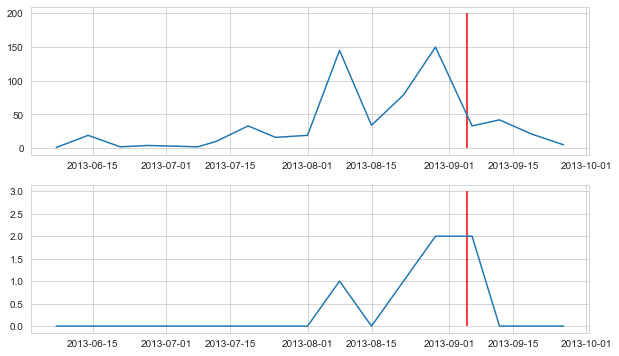

In [48]:
fig = plt.figure()
plt.figure(figsize=(10,6))

plt.subplot(2, 1, 1)
plt.plot(trap_stats_agg['2013'].index, trap_stats_agg['2013']['nummosquitos'])
plt.vlines(x=datetime.datetime(2013, 9, 5), ymin=0, ymax=200, color='r');

plt.subplot(2, 1, 2)
plt.plot(trap_stats_agg['2013'].index, trap_stats_agg['2013']['wnvpresent'])
plt.vlines(x=datetime.datetime(2013, 9, 5), ymin=0, ymax=3, color='r');

### <font color=green>Custer B < Latitude 41.8</font>

In [49]:
cluster_b = train_cleaned[train_cleaned['latitude']<41.8]
spray_b = spray[spray['Latitude']<41.8]

In [50]:
cluster_b.head()

,date,latitude,longitude,nummosquitos,wnvpresent,month,year,day_of_week,day,species_CULEX ERRATICUS,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TARSALIS,species_CULEX TERRITANS,species_UNSPECIFIED CULEX,trap_T001,trap_T002,trap_T002A,trap_T002B,trap_T003,trap_T004,trap_T005,trap_T006,trap_T007,trap_T008,trap_T009,trap_T011,trap_T012,trap_T013,trap_T014,trap_T015,trap_T016,trap_T017,trap_T018,trap_T019,trap_T025,trap_T027,trap_T028,trap_T030,trap_T031,trap_T033,trap_T034,trap_T035,trap_T036,trap_T037,trap_T039,trap_T040,trap_T043,trap_T044,trap_T045,trap_T046,trap_T047,trap_T048,trap_T049,trap_T050,trap_T051,trap_T054,trap_T054C,trap_T060,trap_T061,trap_T062,trap_T063,trap_T065,trap_T065A,trap_T066,trap_T067,trap_T069,trap_T070,trap_T071,trap_T072,trap_T073,trap_T074,trap_T075,trap_T076,trap_T077,trap_T078,trap_T079,trap_T080,trap_T081,trap_T082,trap_T083,trap_T084,trap_T085,trap_T086,trap_T088,trap_T089,trap_T090,trap_T090A,trap_T090B,trap_T090C,trap_T091,trap_T092,trap_T094,trap_T094B,trap_T095,trap_T096,trap_T097,trap_T099,trap_T100,trap_T102,trap_T103,trap_T107,trap_T114,trap_T115,trap_T128,trap_T128A,trap_T129,trap_T135,trap_T138,trap_T141,trap_T142,trap_T143,trap_T144,trap_T145,trap_T146,trap_T147,trap_T148,trap_T149,trap_T150,trap_T151,trap_T152,trap_T153,trap_T154,trap_T155,trap_T156,trap_T157,trap_T158,trap_T159,trap_T160,trap_T161,trap_T162,trap_T200,trap_T200A,trap_T200B,trap_T206,trap_T209,trap_T212,trap_T215,trap_T218,trap_T218A,trap_T218B,trap_T218C,trap_T219,trap_T220,trap_T221,trap_T222,trap_T223,trap_T224,trap_T225,trap_T226,trap_T227,trap_T228,trap_T229,trap_T230,trap_T231,trap_T232,trap_T233,trap_T234,trap_T235,trap_T236,trap_T237,trap_T238,trap_T900,trap_T903
13,2007-05-29,41.688324,-87.676709,1.0,0.0,5,2007,1,29,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,2007-05-29,41.688324,-87.676709,1.0,0.0,5,2007,1,29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,2007-05-29,41.720848,-87.666014,3.0,0.0,5,2007,1,29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,2007-05-29,41.731922,-87.677512,5.0,0.0,5,2007,1,29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,2007-05-29,41.731922,-87.677512,1.0,0.0,5,2007,1,29,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
for day in spray_b['Date'].unique():
    print(day)

2013-07-17T00:00:00.000000000
2013-08-22T00:00:00.000000000
2013-08-29T00:00:00.000000000


In [52]:
def spray_traps(day, cluster):
    max_lat = spray_b[spray_b['Date']==day]['Latitude'].max()
    min_lat = spray_b[spray_b['Date']==day]['Latitude'].min()
    max_long = spray_b[spray_b['Date']==day]['Longitude'].max()
    min_long = spray_b[spray_b['Date']==day]['Longitude'].min()
    trap_stats = cluster_b[(cluster_b['latitude']>=min_lat) &
                           (cluster_b['latitude']<=max_lat) &
                           (cluster_b['longitude']>=min_long) &
                           (cluster_b['longitude']<=max_long)]
    return trap_stats

In [53]:
trap_stats = spray_traps('2013-07-17T00:00:00.000000000', cluster_b)
trap_stats = trap_stats.set_index('date')

trap_stats_agg = trap_stats.groupby('date')['nummosquitos','wnvpresent'].agg(['sum'])
trap_stats_agg.rename(columns={"(nummosquitos, sum)" : "nummosquitos", "(wnvpresent, sum)" : "wnvpresent"}, inplace=True)

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

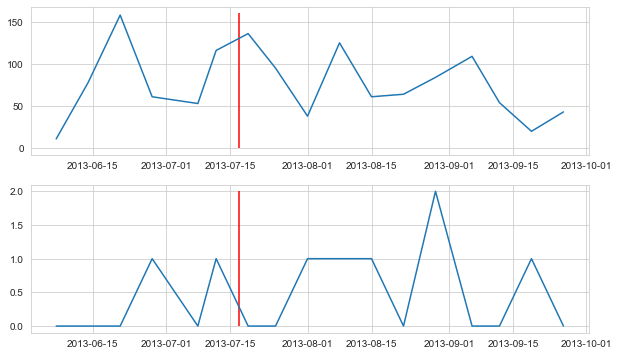

In [54]:
fig = plt.figure()
plt.figure(figsize=(10,6))

plt.subplot(2, 1, 1)
plt.plot(trap_stats_agg['2013'].index, trap_stats_agg['2013']['nummosquitos'])
plt.vlines(x=datetime.datetime(2013, 7, 17), ymin=0, ymax=160, color='r');

plt.subplot(2, 1, 2)
plt.plot(trap_stats_agg['2013'].index, trap_stats_agg['2013']['wnvpresent'])
plt.vlines(x=datetime.datetime(2013, 7, 17), ymin=0, ymax=2, color='r');

In [55]:
trap_stats = spray_traps('2013-08-22T00:00:00.000000000', cluster_b)
trap_stats = trap_stats.set_index('date')

trap_stats_agg = trap_stats.groupby('date')['nummosquitos','wnvpresent'].agg(['sum'])
trap_stats_agg.rename(columns={"(nummosquitos, sum)" : "nummosquitos", "(wnvpresent, sum)" : "wnvpresent"}, inplace=True)

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

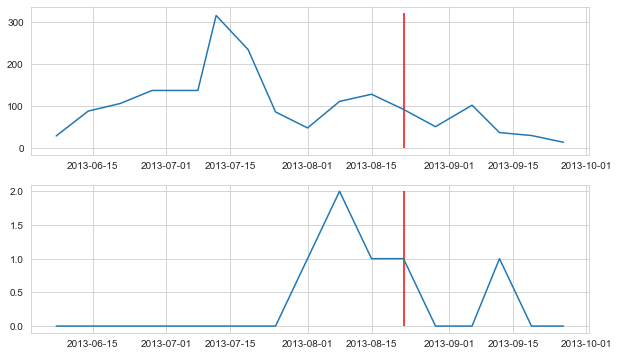

In [56]:
fig = plt.figure()
plt.figure(figsize=(10,6))

plt.subplot(2, 1, 1)
plt.plot(trap_stats_agg['2013'].index, trap_stats_agg['2013']['nummosquitos'])
plt.vlines(x=datetime.datetime(2013, 8, 22), ymin=0, ymax=320, color='r');

plt.subplot(2, 1, 2)
plt.plot(trap_stats_agg['2013'].index, trap_stats_agg['2013']['wnvpresent'])
plt.vlines(x=datetime.datetime(2013, 8, 22), ymin=0, ymax=2, color='r');

In [57]:
trap_stats = spray_traps('2013-08-29T00:00:00.000000000', cluster_b)
trap_stats = trap_stats.set_index('date')

trap_stats_agg = trap_stats.groupby('date')['nummosquitos','wnvpresent'].agg(['sum'])
trap_stats_agg.rename(columns={"(nummosquitos, sum)" : "nummosquitos", "(wnvpresent, sum)" : "wnvpresent"}, inplace=True)

/Users/chuahb/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

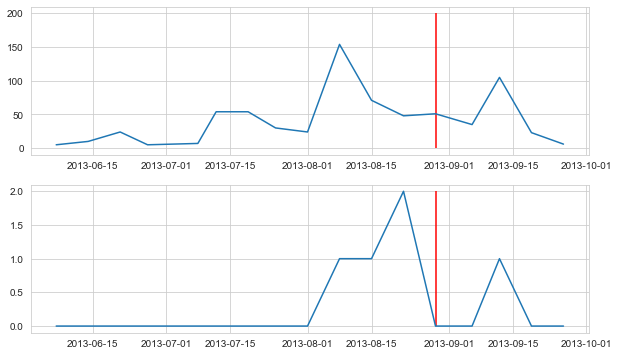

In [58]:
fig = plt.figure()
plt.figure(figsize=(10,6))

plt.subplot(2, 1, 1)
plt.plot(trap_stats_agg['2013'].index, trap_stats_agg['2013']['nummosquitos'])
plt.vlines(x=datetime.datetime(2013, 8, 29), ymin=0, ymax=200, color='r');

plt.subplot(2, 1, 2)
plt.plot(trap_stats_agg['2013'].index, trap_stats_agg['2013']['wnvpresent'])
plt.vlines(x=datetime.datetime(2013, 8, 29), ymin=0, ymax=2, color='r');

In [59]:
spray.to_csv('../Assets/spray_cleaned.csv', index=False)